### Lesson outline

Here's an overview of what you'll learn to do in this lesson. Documentation links are for reference.
#### Read in multiple stocks:

- Create an empty [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) with dates as index: [pandas.date_range](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html)
- Drop missing date rows: [pandas.DataFrame.dropna](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
- Incrementally join data for each stock: [pandas.DataFrame.join](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html)

#### Manipulate stock data:

- [Index and select data](http://pandas.pydata.org/pandas-docs/stable/indexing.html) by row (dates) and column (symbols)
- Plot multiple stocks at once (still using [pandas.DataFrame.plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html))
- Carry out arithmetic operations across stocks


In [1]:
"""Build a dataframe in pandas and filter it by a range of date"""
import pandas as pd

def test_run():
    #Define date range
    start_date = '2010-01-22'
    end_date = '2010-01-26'
    dates = pd.date_range(start_date,end_date)
    
    #Create an empty dataframe
    df1 = pd.DataFrame(index=dates)
    
    
    #Read SPY data into temporary dataframe
    dfSPY = pd.read_csv('data/SPY.csv', index_col='Date', parse_dates=True, 
                        usecols=['Date', 'Adj Close'], na_values=['nan'])
    
    #Join the two dataframes using DataFrame.join()
    #df1 = df1.join(dfSPY)

    # Drop NaN Values
    #df1 = df1.dropna()
    #print df1

    #Join the two dataframes using DataFrame.join(), with how='inner
    df1 = df1.join(dfSPY, how='inner')
    print df1
    
if __name__ == "__main__":
    test_run()    

            Adj Close
2010-01-26  94.730543
2010-01-25  95.129189
2010-01-22  94.643882


In [2]:
"""Build a dataframe in pandas with 3 symbols and filter it by a range of date"""
import pandas as pd

def test_run():
    #Define date range
    start_date = '2010-01-22'
    end_date = '2010-01-26'
    dates = pd.date_range(start_date,end_date)
    
    #Create an empty dataframe
    df1 = pd.DataFrame(index=dates)
    
    
    #Read SPY data into temporary dataframe
    dfSPY = pd.read_csv('data/SPY.csv', index_col='Date', parse_dates=True, 
                        usecols=['Date', 'Adj Close'], na_values=['nan'])

    #Join the two dataframes using DataFrame.join(), with how='inner
    df1 = df1.join(dfSPY, how='inner')
    
    #Read in more stocks
    symbols = ['GOOG', 'IBM', 'GLD']
    for symbol in symbols:
        df_temp = pd.read_csv('data/{}.csv'.format(symbol), index_col='Date',
                             parse_dates=True,usecols=['Date', 'Adj Close'], 
                              na_values=['nan'])
        #Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1 = df1.join(df_temp)
    
    print df1
    
if __name__ == "__main__":
    test_run() 

            Adj Close        GOOG         IBM         GLD
2010-01-26  94.730543  270.939526  105.769566  107.559998
2010-01-25  95.129189  269.730740  106.080779  107.480003
2010-01-22  94.643882  274.730736  105.559289  107.169998


---
## Quiz: Utility functions for reading data

In [23]:
"""Utility functions"""

import os
import pandas as pd

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol).format(symbol), index_col='Date',
                             parse_dates=True,usecols=['Date', 'Adj Close'], 
                              na_values=['nan'])
        #Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY': #Drop dates SPY did not trade
            df = df.dropna(subset=['SPY'])   

    return df


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-01-26')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    print df


if __name__ == "__main__":
    test_run()

                  SPY        GOOG         IBM         GLD
2010-01-22  94.643882  274.730736  105.559289  107.169998
2010-01-25  95.129189  269.730740  106.080779  107.480003
2010-01-26  94.730543  270.939526  105.769566  107.559998


---

In [29]:
"""Slice"""

import os
import pandas as pd

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol).format(symbol), index_col='Date',
                             parse_dates=True,usecols=['Date', 'Adj Close'], 
                              na_values=['nan'])
        #Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY': #Drop dates SPY did not trade
            df = df.dropna(subset=['SPY'])   

    return df


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-12-31') #The year 2010

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    
    # Slice by row range (dates) using DataFrame.ix[] selector
    #print df.ix['2010-01-01':'2010-01-31'] #The month of January
    
    # Slice by column (symbols)
    #print df['GOOG'] #A single label selects a sigle column
    #print df[['IBM','GLD']] #A list of labels selects multiple columns
    
    # Slice by row and column
    print df.ix['2010-03-10':'2010-03-15', ['SPY', 'IBM']]
    
if __name__ == "__main__":
    test_run()

                   SPY         IBM
2010-03-10   99.635632  106.132808
2010-03-11  100.051607  107.805650
2010-03-12  100.060275  108.092910
2010-03-15  100.086273  107.999974


---
## Quiz: How To Plot On "Equal Footing"?

$df1 = df1/df1.ix[0]$

---

<IPython.core.display.Javascript object>


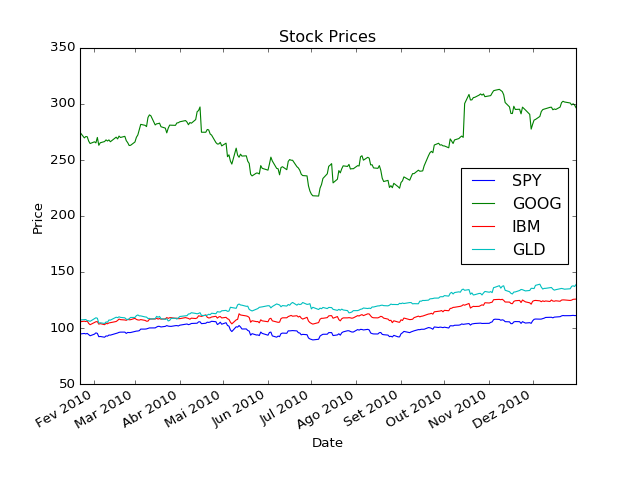

In [38]:
"""Plot"""

import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol).format(symbol), index_col='Date',
                             parse_dates=True,usecols=['Date', 'Adj Close'], 
                              na_values=['nan'])
        #Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY': #Drop dates SPY did not trade
            df = df.dropna(subset=['SPY'])   

    return df

def plot_data(df, title = 'Stock Prices', fontsize = 2):
    '''Plot stock prices'''
    ax = df.plot(title=title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show() #must be called to show plots in some environments


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-12-31') #The year 2010

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    plot_data(df)


if __name__ == "__main__":
    test_run()

---
## Quiz: Slice And Plot Two Stocks

Instructions:

- Implement the function plot_selected() which accepts a dataframe, a list of columns and the starting and ending row indices, and plots the selected data.
- Remember to call plt.show() at the end, or better - use the plot_data() function defined earlier.
- Use Test Run to execute your code, and try to plot the desired subset of the dataframe.
- You do not need to Submit your code - this is an ungraded exercise. Please continue to view the answer when you are satisfied with the results.



<IPython.core.display.Javascript object>


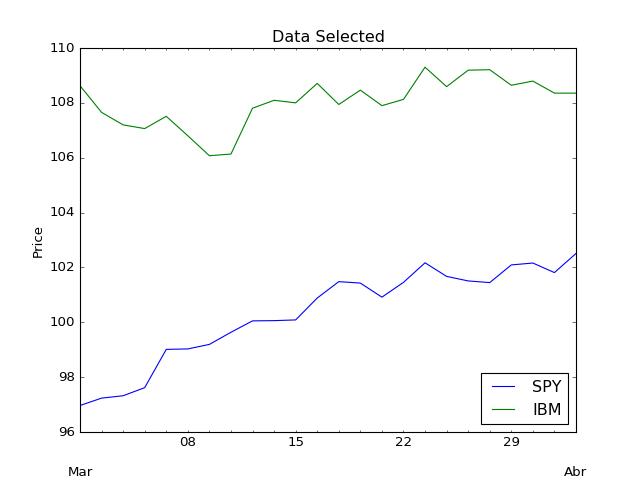

In [46]:
"""Utility functions"""

import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol).format(symbol), index_col='Date',
                             parse_dates=True,usecols=['Date', 'Adj Close'], 
                              na_values=['nan'])
        #Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY': #Drop dates SPY did not trade
            df = df.dropna(subset=['SPY'])   

    return df

def plot_data(df, title = 'Stock Prices', fontsize = 2):
    '''Plot stock prices'''
    ax = df.plot(title=title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show() #must be called to show plots in some environments
    
def plot_selected(df, columns, start_index, end_index):
    '''Plot the desired columns over index values in the given range.'''
    plot_data(df.ix[start_index:end_index, columns], title = 'Data Selected')

def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-12-31') #The year 2010

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    
    # Slice and plot
    plot_selected(df, ['SPY', 'IBM'], '2010-3-01', '2010-04-01')


if __name__ == "__main__":
    test_run()

---

<IPython.core.display.Javascript object>


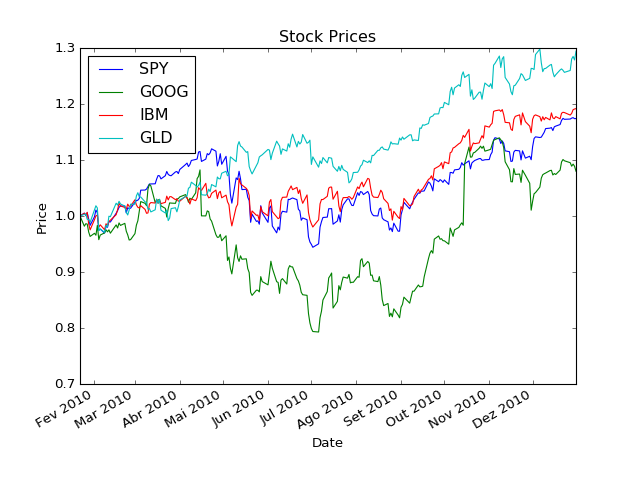

In [47]:
"""Normalize Data"""

import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol).format(symbol), index_col='Date',
                             parse_dates=True,usecols=['Date', 'Adj Close'], 
                              na_values=['nan'])
        #Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY': #Drop dates SPY did not trade
            df = df.dropna(subset=['SPY'])   

    return df

def plot_data(df, title = 'Stock Prices', fontsize = 2):
    '''Plot stock prices'''
    ax = df.plot(title=title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show() #must be called to show plots in some environments
    
def plot_selected(df, columns, start_index, end_index):
    '''Plot the desired columns over index values in the given range.'''
    plot_data(df.ix[start_index:end_index, columns], title = 'Data Selected')
    
def normalize_data(df):
    '''Normalize stock prices using the first row of the dataframe.'''
    return df / df.ix[0,:] #Dividing all DataFrame by the first row.

def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-12-31') #The year 2010

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    plot_data(normalize_data(df))


if __name__ == "__main__":
    test_run()